# Testing Normal Distribution Assumption

In [1]:
from koopman_probabilistic import *
import vanilla_benchmark

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm, skewnorm, skew

## Pinball Loss

In [2]:
def normal_pinball_loss(data, mus, sigmas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = norm.ppf(q, loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [3]:
def skew_pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [4]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

## Vanilla Benchmark Forecast

In [34]:
min_train_start = 9 * 365 * 24 + 2 * 24  # 2 leap years in from 2005 to 2014
train_starts = np.linspace(min_train_start, min_train_start + 24 * 365 - 24, 12, endpoint=False).astype(int)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [6]:
print(list(train_starts))

[78888, 79616, 80344, 81072, 81800, 82528, 83256, 83984, 84712, 85440, 86168, 86896]


In [7]:
zone_name = "ISONE CA"

'2021-03-03_08.23.07.134402'

ISONE CA
start: 2014-01-01 00:00:00


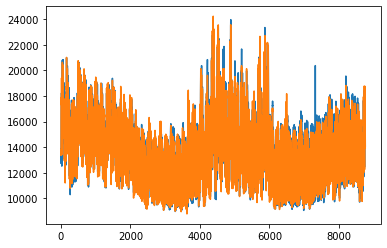

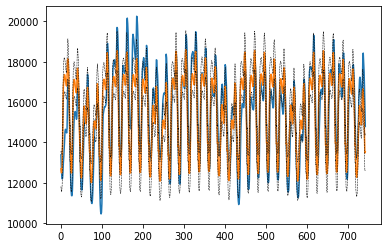

{'ISONE CA': 356.65285345770917}
ISONE CA
start: 2014-01-31 00:00:00


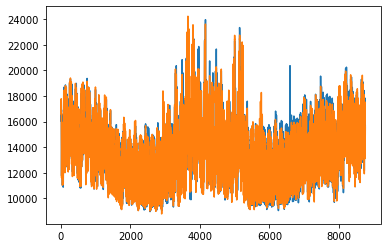

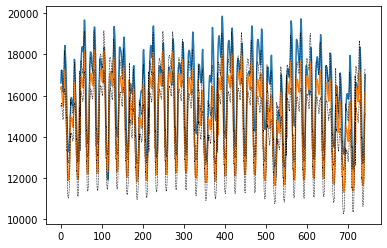

{'ISONE CA': 481.60001293416417}
ISONE CA
start: 2014-03-02 00:00:00


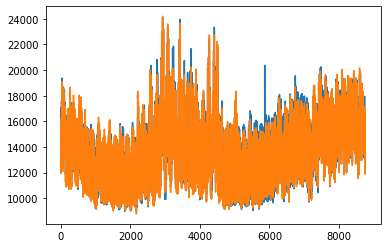

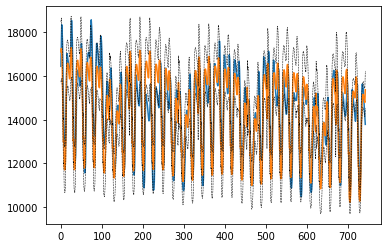

{'ISONE CA': 306.9847366241878}
ISONE CA
start: 2014-04-02 00:00:00


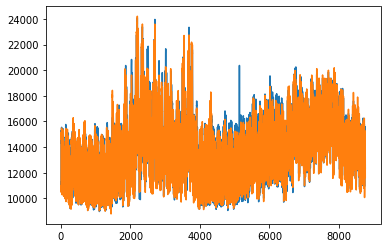

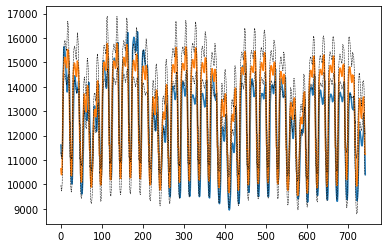

{'ISONE CA': 300.8401201239931}
ISONE CA
start: 2014-05-02 00:00:00


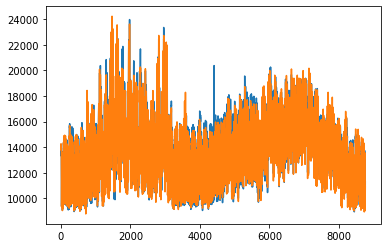

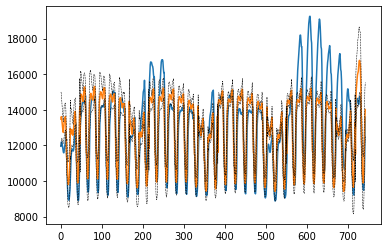

{'ISONE CA': 456.5542981969828}
ISONE CA
start: 2014-06-01 00:00:00


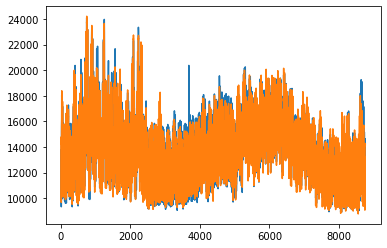

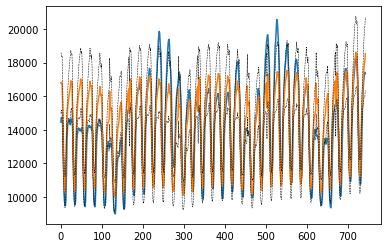

{'ISONE CA': 424.49642594094337}
ISONE CA
start: 2014-07-02 00:00:00


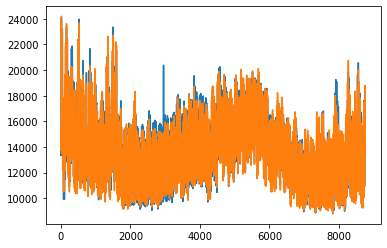

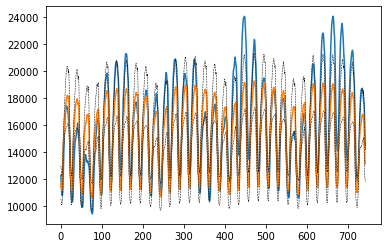

{'ISONE CA': 602.1345034614963}
ISONE CA
start: 2014-08-01 00:00:00


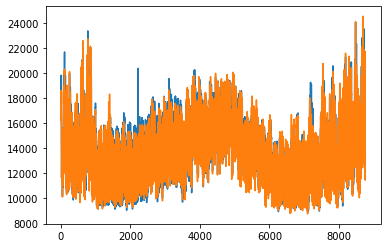

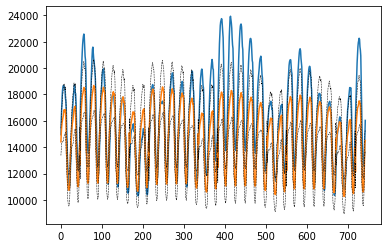

{'ISONE CA': 693.6073318641133}
ISONE CA
start: 2014-08-31 00:00:00


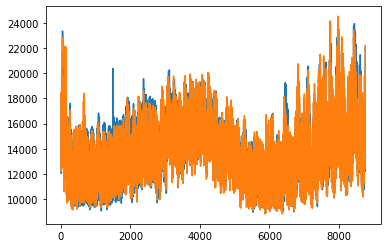

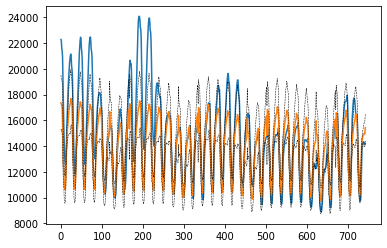

{'ISONE CA': 638.0186776975577}
ISONE CA
start: 2014-10-01 00:00:00


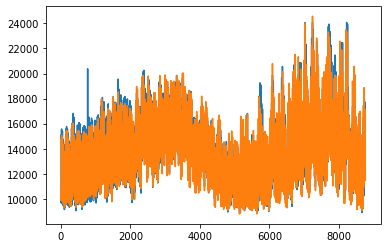

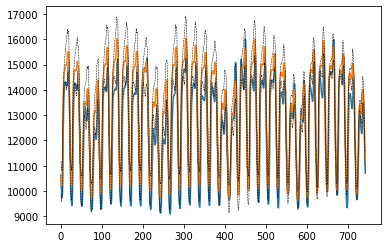

{'ISONE CA': 284.1337486215403}
ISONE CA
start: 2014-10-31 00:00:00


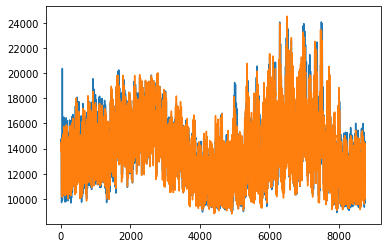

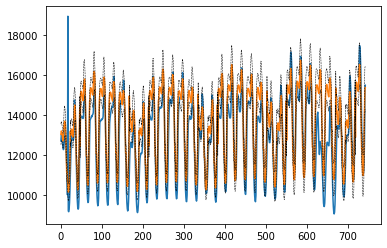

{'ISONE CA': 361.2858309902031}
ISONE CA
start: 2014-11-30 00:00:00


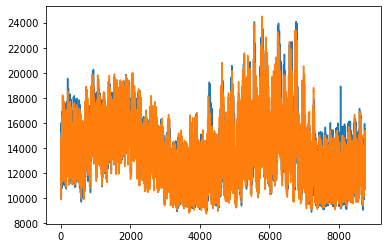

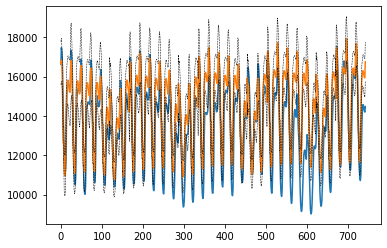

{'ISONE CA': 492.39473862092865}


In [9]:
vanilla_losses = []
for train_start in train_starts:
    vanilla_losses.append(vanilla_benchmark.get_lossesGEFCom(start=train_start, zones=[zone_name], plot=True)[zone_name])

In [10]:
for loss in vanilla_losses:
    print(np.round(loss, 1), end="\t")

356.7	481.6	307.0	300.8	456.6	424.5	602.1	693.6	638.0	284.1	361.3	492.4	

In [13]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
data = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))

In [14]:
# rescale data
x_original = data
mean = np.mean(data, axis=0)
rnge = np.max(data, axis=0) - np.min(data, axis=0)
data = (data - np.matlib.repmat(mean, data.shape[0], 1)) / np.matlib.repmat(rnge, data.shape[0], 1)
print("data", data.shape)

data (96408, 1)


# Forecasting mean and variance of Gaussian

TRAIN START: 78888 = 2014-01-01 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.8385713549394422
Loss at iteration 110: -1.9034813341674035
Final loss: -1.9122255221209028
Loss at iteration 10: -1.7072736823637176
Loss at iteration 110: -1.7515430201209372
Loss at iteration 210: -1.7573719375876515
Loss at iteration 310: -1.7614538627971412
Loss at iteration 410: -1.7647695169741406
Loss at iteration 510: -1.7676222875919787
Loss at iteration 610: -1.7701433765402756
Loss at iteration 710: -1.7724071246505722
Loss at iteration 810: -1.7744627993369737
Loss at iteration 910: -1.776345622540718
Final loss: -1.7778960352571551


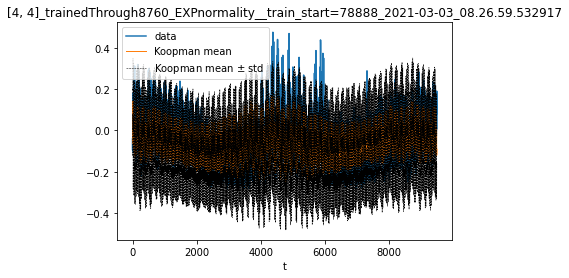

actual overall mean: 0  predicted mean: -0.068210095


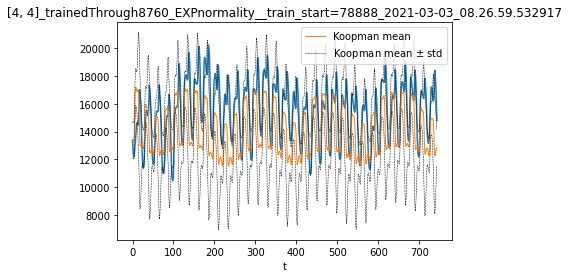

pinball_loss: 711.7742743008523
-99.57060974005425% performance relative to vanilla benchmark





TRAIN START: 80344 = 2014-03-02 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -2.2042574493500258
Loss at iteration 110: -2.2327044415946022
Final loss: -2.242043957554033
Loss at iteration 10: -1.9054410227705578
Loss at iteration 110: -1.9307869559794721
Loss at iteration 210: -1.9374750300704973
Loss at iteration 310: -1.9430309598456144
Loss at iteration 410: -1.9481154992765652
Loss at iteration 510: -1.9529872646360882
Loss at iteration 610: -1.9577791623465923
Loss at iteration 710: -1.9625719136366024
Loss at iteration 810: -1.967382075161647
Loss at iteration 910: -1.972159523152864
Final loss: -1.9763126816116692


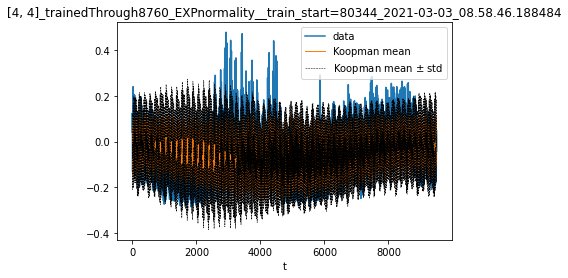

actual overall mean: 0  predicted mean: -0.012563624


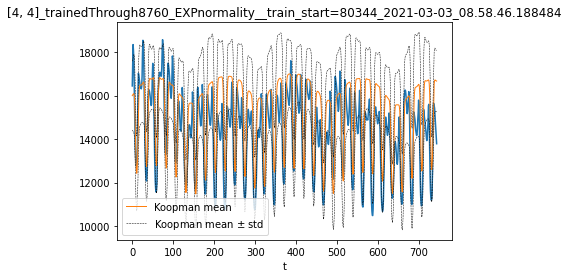

pinball_loss: 436.06301941418354
-42.0471337465921% performance relative to vanilla benchmark





TRAIN START: 81800 = 2014-05-02 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.7997266932732972
Loss at iteration 110: -1.890152468739283
Final loss: -1.9048222178494918
Loss at iteration 10: -1.63876728824071
Loss at iteration 110: -1.6963419152988322
Loss at iteration 210: -1.7130607324459923
Loss at iteration 310: -1.7282504920110773
Loss at iteration 410: -1.742920425337246
Loss at iteration 510: -1.7572990939179047
Loss at iteration 610: -1.7712863993182917
Loss at iteration 710: -1.7846235465472509
Loss at iteration 810: -1.7970124447956084
Loss at iteration 910: -1.8082191296314991
Final loss: -1.8171138080405893


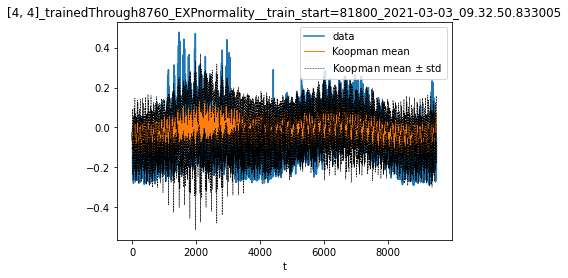

actual overall mean: 0  predicted mean: -0.022092879


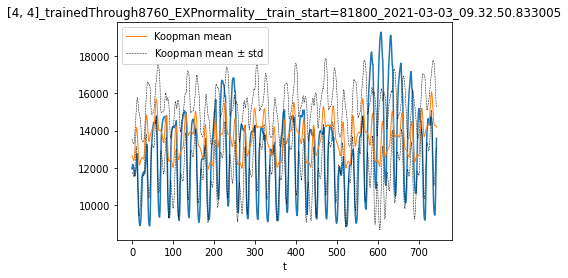

pinball_loss: 703.6311941925798
-54.11774611943183% performance relative to vanilla benchmark





TRAIN START: 83256 = 2014-07-02 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.8150116051613046
Loss at iteration 110: -1.898861917114474
Final loss: -1.9043312465694313
Loss at iteration 10: -1.6954920564571148
Loss at iteration 110: -1.7382661958326635
Loss at iteration 210: -1.74174403553061
Loss at iteration 310: -1.7446746166018605
Loss at iteration 410: -1.7474714861447975
Loss at iteration 510: -1.750169447500231
Loss at iteration 610: -1.752772484260978
Loss at iteration 710: -1.7552714733361559
Loss at iteration 810: -1.7576499705174873
Loss at iteration 910: -1.7598891836465669
Final loss: -1.761749900654001


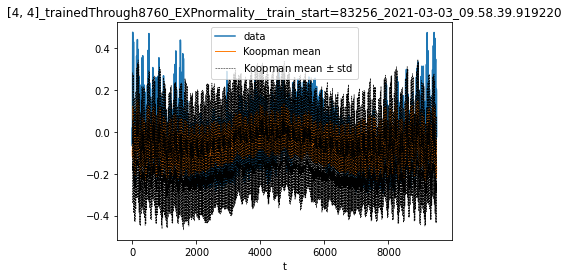

actual overall mean: 0  predicted mean: -0.06686694


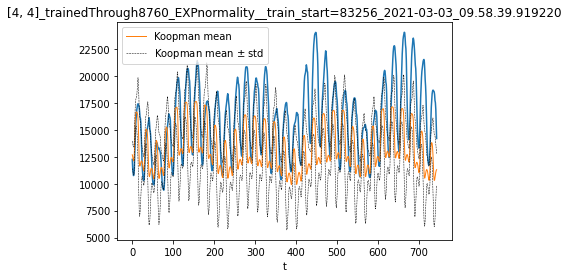

pinball_loss: 1216.399906835562
-102.01464952478764% performance relative to vanilla benchmark





TRAIN START: 84712 = 2014-08-31 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -2.174145643280161
Loss at iteration 110: -2.192322549827632
Final loss: -2.2004283635582644
Loss at iteration 10: -1.7961912843892909
Loss at iteration 110: -1.8350687506871817
Loss at iteration 210: -1.8435272190745184
Loss at iteration 310: -1.850259925992249
Loss at iteration 410: -1.8560932082545103
Loss at iteration 510: -1.8613161792300166
Loss at iteration 610: -1.866186434659301
Loss at iteration 710: -1.8708876776449315
Loss at iteration 810: -1.8755389607793547
Loss at iteration 910: -1.8801932792203833
Final loss: -1.8843330974848094


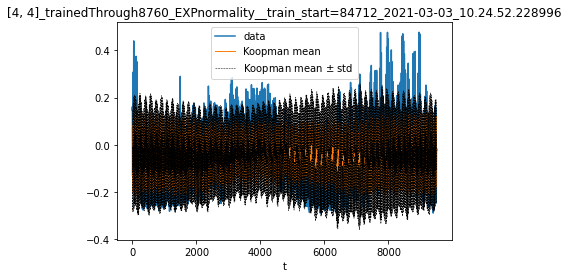

actual overall mean: 0  predicted mean: -0.009708438


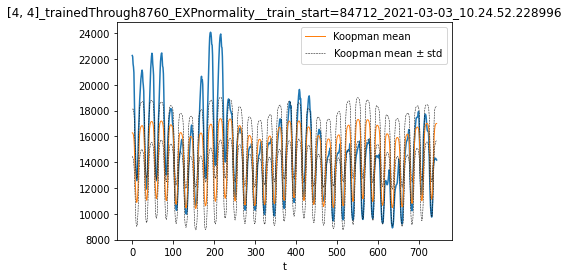

pinball_loss: 633.4565141006493
0.7150517306753534% performance relative to vanilla benchmark





TRAIN START: 86168 = 2014-10-31 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.7643757439125984
Loss at iteration 110: -1.83319886732558
Final loss: -1.854650668999055
Loss at iteration 10: -1.6365811423051113
Loss at iteration 110: -1.6678412191714174
Loss at iteration 210: -1.6845428479891635
Loss at iteration 310: -1.700630076417758
Loss at iteration 410: -1.716900795109222
Loss at iteration 510: -1.7334763988069266
Loss at iteration 610: -1.749973489400538
Loss at iteration 710: -1.765680377012539
Loss at iteration 810: -1.77987907800559
Loss at iteration 910: -1.792132624815559
Final loss: -1.801328149312914


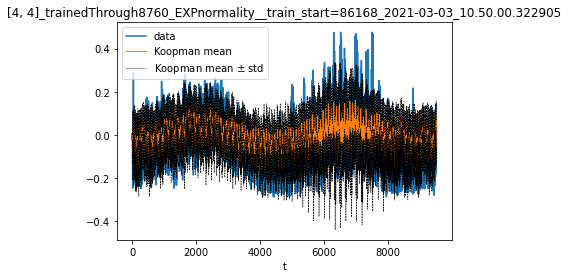

actual overall mean: 0  predicted mean: -0.0152208


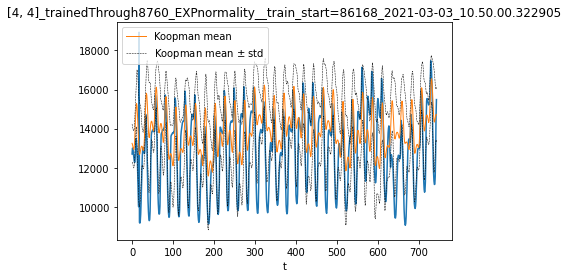

pinball_loss: 581.9665996413978
-61.08204355713547% performance relative to vanilla benchmark







In [15]:
%matplotlib inline
mu_hats = []
sigma_hats = []
z_scores_list = []
test_z_scores_list = []
losses = []
relative_perf = []

for month, train_start in list(enumerate(train_starts))[::2]:
    print("TRAIN START:", train_start, "=", all_data[zone_name]["Date"][train_start])
    
    train_through = 365 * 24
    delay = 0  # 52 * 24
    predict_through = train_through + 24 * 31 + delay  
    x = data[train_start:]
    x = x[:predict_through]
    xt = x[:train_through]
    
    now = ("_".join(str(datetime.now()).split())).replace(":", ".")
    data_name = "EXPnormality_" + f"_train_start={train_start}_" + now

    num_freqs = [4, 4]
    num_fourier = 4
    mu_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}mu.npy"
    sigma_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}sigma.npy"
    print("x", x.shape)
    print("xt", xt.shape)
    
    
    ### TRAIN ###
    model = AlternatingNormalNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=512)
    k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
    
    k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.25])
    
    k.fit(xt, iterations=200, interval=10, verbose=False, cutoff=0, weight_decay=1e-10000, lr_theta=1e-3, lr_omega=0, num_slices=None);
    k.fit(xt, iterations=1000, interval=10, verbose=False, cutoff=0, weight_decay=1e-10000, lr_theta=1e-5, lr_omega=0, num_slices=None);
    
    
    ### FORECAST ###
    params = k.predict(predict_through)
    mu_hats.append(params[0])
    sigma_hats.append(params[1])
    np.save(mu_file, mu_hats[-1])
    np.save(sigma_file, sigma_hats[-1])
    
    mean_hat = model.mean(params)
    std_hat = model.std(params)
    
    dim = 0
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    #plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    #plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()
    
    ### ANALYTICS ###
    print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))
    
    z_scores_list.append((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
    test_z_scores_list.append(
        (x[train_through + delay:predict_through] - mean_hat[train_through + delay:predict_through]) 
         / std_hat[train_through + delay:predict_through])
    
    ### PERFORMANCE ###
    test_start = train_through + delay

    # Normal Distribution Rescaling to de-normalize data because pinball loss is not scale-invariant
    sigh = sigma_hats[-1][test_start: predict_through] * rnge
    muh = mu_hats[-1][test_start: predict_through] * rnge + mean
    mean_hat = model.mean([muh, sigh])
    std_hat = model.std([muh, sigh])

    plt.figure()
    plt.plot(x_original[train_start:][test_start: predict_through])
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    # plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    # plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()
    
    loss = normal_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh)[0]
    relative = (1 - loss/vanilla_losses[month]) * 100
    print("pinball_loss:", loss)
    print(f"{relative}% performance relative to vanilla benchmark" + "\n"*5)
    losses.append(loss)
    relative_perf.append(relative)
    
%matplotlib notebook

# Forecasting mean, variance, and skewness of Skew-Normal distribution

TRAIN START: 79616 = 2014-01-31 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.1717886632815986
Loss at iteration 110: -1.330662139689431
Loss at iteration 210: -1.3703259009936957
Loss at iteration 310: -1.3916377932077288
Loss at iteration 410: -1.4010253163192496
Final loss: -1.4077088100846555


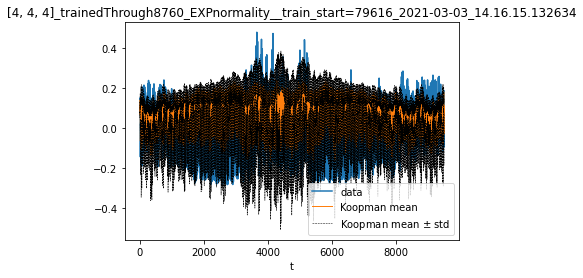

actual overall mean: 0  predicted mean: 0.06577407


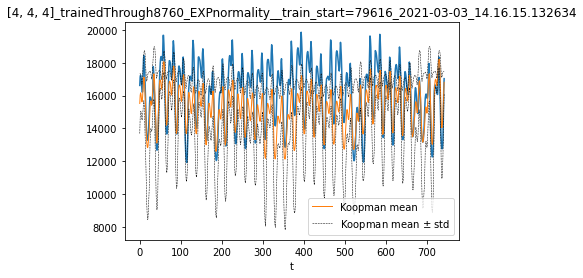

pinball_loss: 579.9086918266953
-20.412931115508528% performance relative to vanilla benchmark





TRAIN START: 81072 = 2014-04-02 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.3720337571083903
Loss at iteration 110: -1.4032674912343148
Loss at iteration 210: -1.439996420345737
Loss at iteration 310: -1.4712783248553585
Loss at iteration 410: -1.49898705311177
Final loss: -1.4816430800818534


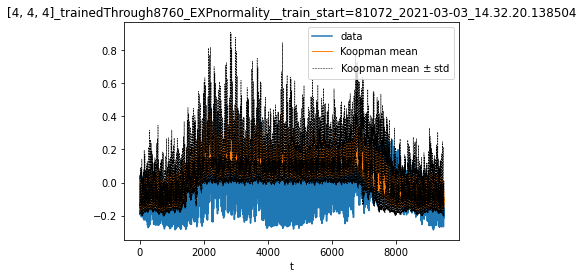

actual overall mean: 0  predicted mean: 0.09339499


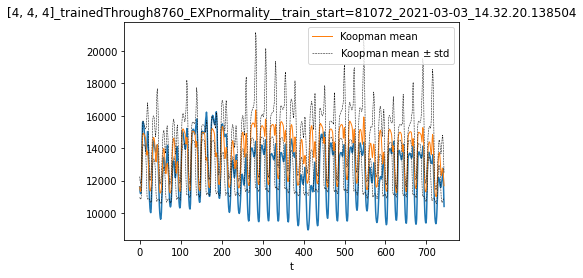

pinball_loss: 477.9950686889165
-58.88674306203172% performance relative to vanilla benchmark





TRAIN START: 82528 = 2014-06-01 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.5569268761787294
Loss at iteration 110: -1.7447680481575598
Loss at iteration 210: -1.7886085004985215
Loss at iteration 310: -1.8211038681301657
Loss at iteration 410: -1.820956629818903
Final loss: -1.793983370298497


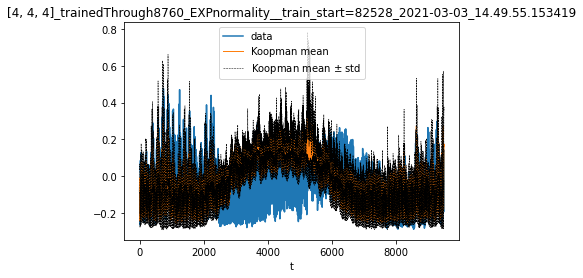

actual overall mean: 0  predicted mean: 0.0026727323


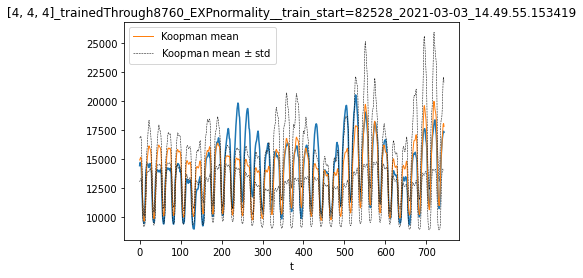

pinball_loss: 726.9775211709416
-71.25645276270944% performance relative to vanilla benchmark





TRAIN START: 83984 = 2014-08-01 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.1749954776591705
Loss at iteration 110: -1.3170503307370904
Loss at iteration 210: -1.3416767924117212
Loss at iteration 310: -1.3572435195501467
Loss at iteration 410: -1.3751833742663295
Final loss: -1.3883640116223006


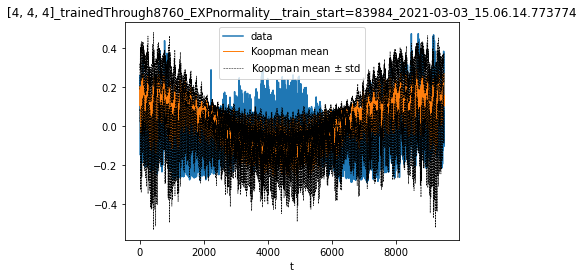

actual overall mean: 0  predicted mean: 0.021037914


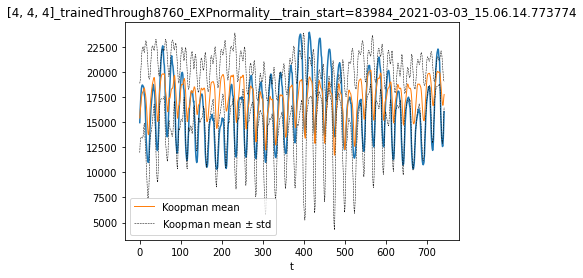

pinball_loss: 1383.3381476552656
-99.44110797350676% performance relative to vanilla benchmark





TRAIN START: 85440 = 2014-10-01 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.2958914850016505
Loss at iteration 110: -1.4766005458947358
Loss at iteration 210: -1.4981543185277277
Loss at iteration 310: -1.5244613363673127
Loss at iteration 410: -1.5477629439279454
Final loss: -1.5539772797694165


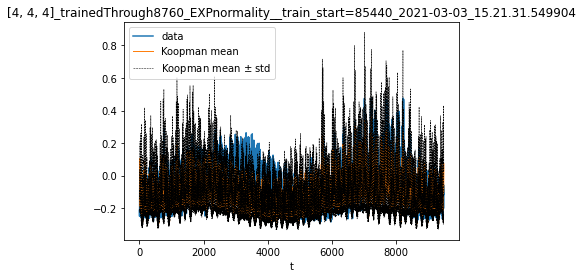

actual overall mean: 0  predicted mean: -0.06618198


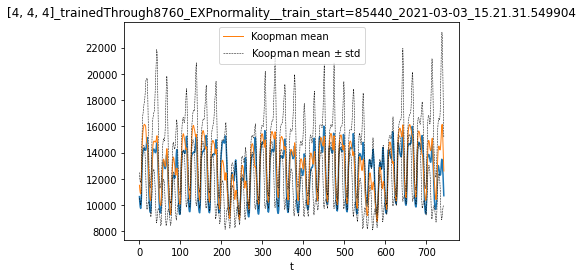

pinball_loss: 593.2305417298683
-108.7856668234219% performance relative to vanilla benchmark





TRAIN START: 86896 = 2014-11-30 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: -1.534732613550804
Loss at iteration 110: -1.6894495938175427
Loss at iteration 210: -1.7341874681930687
Loss at iteration 310: -1.7625853721544087
Loss at iteration 410: -1.781480276051518
Final loss: -1.7937724454214974


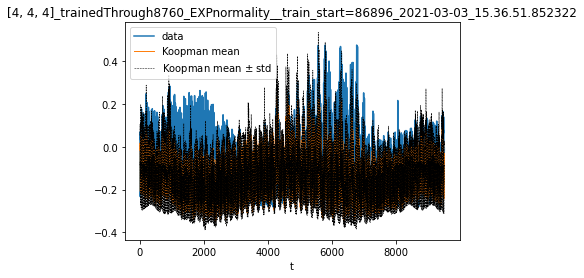

actual overall mean: 0  predicted mean: -0.10411739


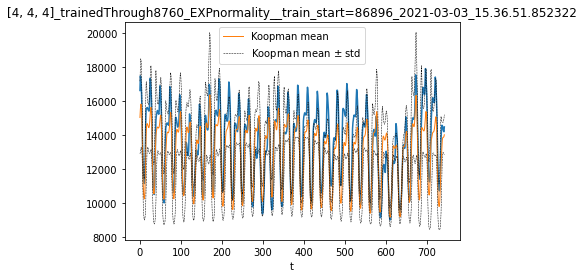

pinball_loss: 694.4621429507149
-41.03768551543121% performance relative to vanilla benchmark







In [43]:
%matplotlib inline
mu_hats = []
sigma_hats = []
z_scores_list = []
test_z_scores_list = []
losses = []
relative_perf = []

for month, train_start in list(enumerate(train_starts))[1::2]:
    print("TRAIN START:", train_start, "=", all_data[zone_name]["Date"][train_start])
    
    train_through = 365 * 24
    delay = 0  # 52 * 24
    predict_through = train_through + 24 * 31 + delay  
    x = data[train_start:]
    x = x[:predict_through]
    xt = x[:train_through]
    
    now = ("_".join(str(datetime.now()).split())).replace(":", ".")
    data_name = "EXPnormality_" + f"_train_start={train_start}_" + now

    
    num_freqs = [4, 4, 4]
    num_fourier = 4
    mu_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}mu.npy"
    sigma_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}sigma.npy"
    alpha_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}alpha.npy"
    print("x", x.shape)
    print("xt", xt.shape)
    
    
    ### TRAIN ###
    model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=512)
    k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
    
    k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.25])
    
    k.fit(xt, iterations=500, interval=10, verbose=False, cutoff=0, weight_decay=1e-10000, lr_theta=1e-3, lr_omega=0, num_slices=None);
#     k.fit(xt, iterations=300, interval=10, verbose=False, cutoff=0, weight_decay=1e-10000, lr_theta=1e-5, lr_omega=0, num_slices=None);
    
    
    ### FORECAST ###
    params = k.predict(predict_through)
    mu_hat, sigma_hat, a_hat = params
    np.save(mu_file, mu_hat)
    np.save(sigma_file, sigma_hat)
    np.save(alpha_file, a_hat)
    
    mean_hat = model.mean(params)
    std_hat = model.std(params)
    
    dim = 0
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    #plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    #plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()
    
    ### ANALYTICS ###
    print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))
    
    z_scores_list.append((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
    test_z_scores_list.append(
        (x[train_through + delay:predict_through] - mean_hat[train_through + delay:predict_through]) 
         / std_hat[train_through + delay:predict_through])
    
    ### PERFORMANCE ###
    
    #Skew-Normal distribution Rescaling to de-normalize data because pinball loss is not scale-invariant
    test_start = train_through + delay
    sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
    delta = ah / (1 + ah ** 2) ** 0.5
    muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    sigh = sigh * rnge
    mean_hat = model.mean([muh, sigh, ah])
    std_hat = model.std([muh, sigh, ah])

    plt.figure()
    plt.plot(x_original[train_start:][test_start: predict_through])
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    # plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    # plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()
    
    loss = normal_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh)[0]
    relative = (1 - loss/vanilla_losses[month]) * 100
    print("pinball_loss:", loss)
    print(f"{relative}% performance relative to vanilla benchmark" + "\n"*5)
    losses.append(loss)
    relative_perf.append(relative)
    
%matplotlib notebook

# Figures

In [44]:
# for tables
for loss in losses:
    print(np.round(loss, 1), end="\t")
print("")
for rel in relative_perf:
    print(np.round(rel, 1), end="%\t")

579.9	478.0	727.0	1383.3	593.2	694.5	
-20.4%	-58.9%	-71.3%	-99.4%	-108.8%	-41.0%	

mean of z-scores in month Jan: -1.187509314336211 std of z-scores: 1.9129425713719443
mean of z-scores in month Feb: -2.0604352034295497 std of z-scores: 2.5511287797083226
mean of z-scores in month Mar: -0.6721023960798165 std of z-scores: 2.615302909093841
mean of z-scores in month Apr: -0.13251378930850113 std of z-scores: 2.49364805994485
mean of z-scores in month May: 0.6755919974494834 std of z-scores: 1.405418239501453
mean of z-scores in month Jun: 1.6901949644407757 std of z-scores: 2.269790356216734


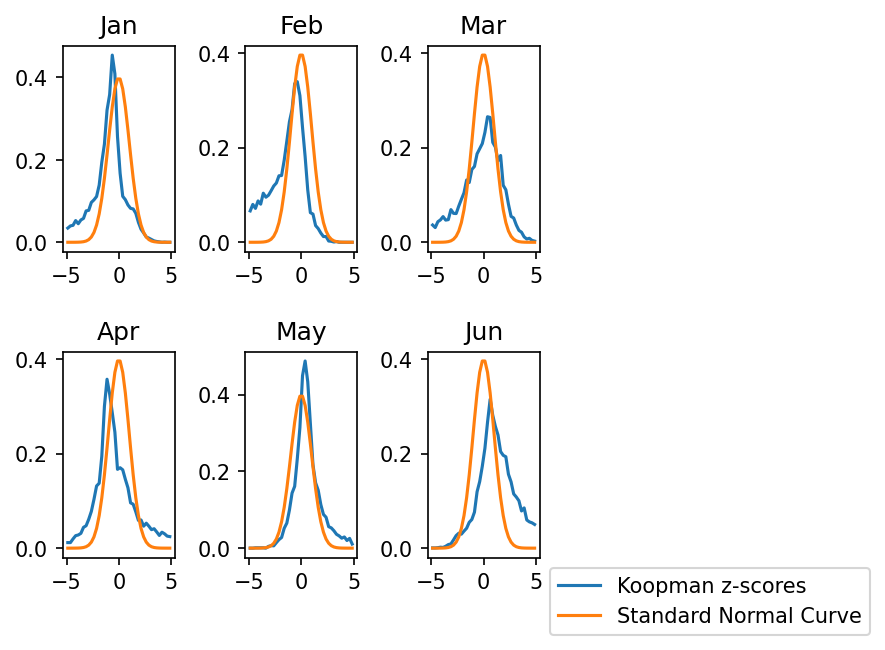

In [45]:
%matplotlib inline
plt.subplots(dpi=150, figsize=(6, 8))
for month, z_scores in enumerate(z_scores_list):
    z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
    z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
    print(f"mean of z-scores in month {months[month]}:", np.mean(z_scores), "std of z-scores:", np.std(z_scores))
    
    plt.subplot(4, 3, month + 1)
    plt.plot(z_axis, z_hist, label="Koopman z-scores")
    plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
    plt.title(months[month])
#     plt.xlabel("z")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

mean of z-scores in month 0: 0.8959568781042371 std of z-scores: 1.1144650770226965
mean of z-scores in month 1: -1.3742184719612858 std of z-scores: 1.474098078853907
mean of z-scores in month 2: 0.26420680832518634 std of z-scores: 1.2720130454805667
mean of z-scores in month 3: -0.10859197018562027 std of z-scores: 1.307799210750803
mean of z-scores in month 4: -0.4291496550284708 std of z-scores: 0.8099867714139894
mean of z-scores in month 5: 0.5280116049478111 std of z-scores: 0.9082856151106483


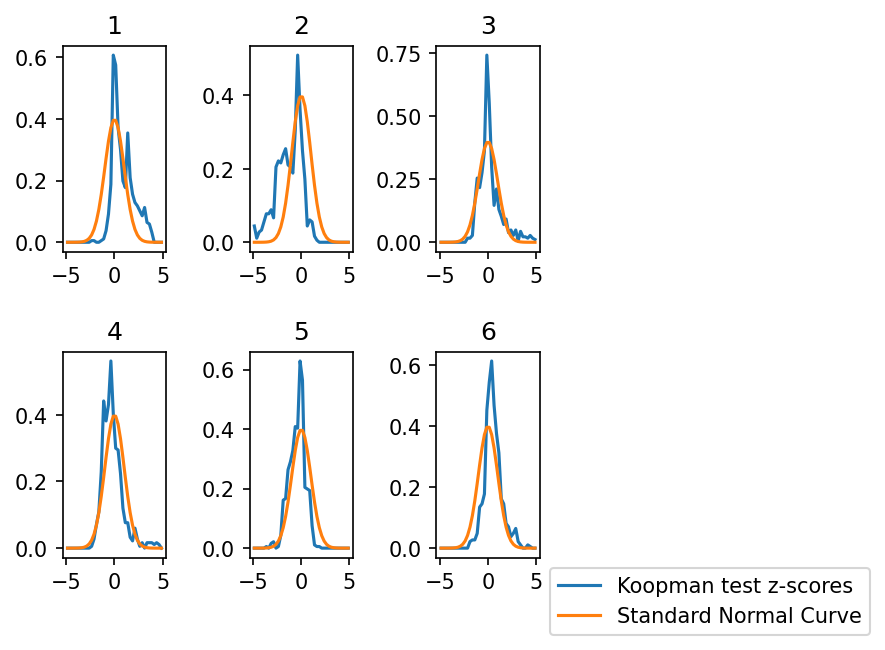

In [46]:
%matplotlib inline
plt.subplots(dpi=150, figsize=(6, 8))
for month, z_scores in enumerate(test_z_scores_list):
    z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
    z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
    print(f"mean of z-scores in month {month}:", np.mean(z_scores), "std of z-scores:", np.std(z_scores))
    
    plt.subplot(4, 3, month + 1)
    plt.plot(z_axis, z_hist, label="Koopman test z-scores")
    plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
    plt.title(str(month + 1))
#     plt.xlabel("z")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

In [47]:
for z_scores in z_scores_list:
    print(np.round(np.mean(z_scores), 2), end="\t")
print()
for z_scores in z_scores_list:
    print(np.round(np.std(z_scores), 2), end="\t")
print()
for z_scores in z_scores_list:
    print(np.round(skew(z_scores)[0], 2), end="\t")
print()
for z_scores in test_z_scores_list:
    print(np.round(np.mean(z_scores), 2), end="\t")
print()
for z_scores in test_z_scores_list:
    print(np.round(np.std(z_scores), 2), end="\t")
print()
for z_scores in test_z_scores_list:
    print(np.round(skew(z_scores)[0], 2), end="\t")

-1.19	-2.06	-0.67	-0.13	0.68	1.69	
1.91	2.55	2.62	2.49	1.41	2.27	
-1.34	-1.37	-1.27	0.93	1.13	0.95	
0.9	-1.37	0.26	-0.11	-0.43	0.53	
1.11	1.47	1.27	1.31	0.81	0.91	
0.7	-0.86	1.59	2.38	-0.39	0.66	

In [41]:
k.fit(xt, iterations=200, interval=10, verbose=False, cutoff=0, weight_decay=1e-10000, lr_theta=1e-5, lr_omega=0, num_slices=None);

Loss at iteration 10: -1.0222827874138578
Loss at iteration 110: -1.1105913022290157
Final loss: -1.1644505935616276
